## Objective:
#### The objective of this assignment is to implement PCA on a given dataset and analyse the results.

#### Download the wine dataset from the UCI Machine Learning Repository
#### Load the dataset into a Pandas dataframe.

In [2]:
import pandas as pd

# Load the Wine dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
# Define the column names for the Wine dataset
col_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
             'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
             'Proanthocyanins', 'Color intensity', 'Hue',
             'OD280/OD315 of diluted wines', 'Proline']
# Load the dataset into a Pandas dataframe
df = pd.read_csv(url, header=None, names=col_names)

# Print the first 5 rows of the dataframe
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Split the dataset into features and target variables.

In [5]:
# Split the dataset into features and target variables
X = df.drop('Class', axis=1)
y = df['Class']

# Print the first 5 rows of the feature dataframe
X.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Print the first 5 rows of the target variable dataframe
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

#### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

In [8]:
# Scale the feature variables using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Print the first 5 rows of the feature dataframe after scaling
pd.DataFrame(X, columns=col_names[1:]).head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

#### Implement PCA on the preprocessed dataset using the scikit-learn library.

In [10]:
# Apply PCA to the scaled feature variables
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


#### Determine the optimal number of principal components to retain based on the explained variance ratio.

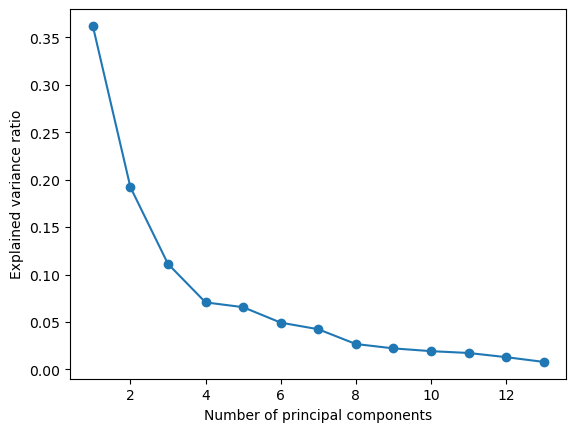

In [11]:
# Plot the explained variance ratio against the number of principal components
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
By examining the plot, we can see how much variance in the data is explained by each principal component. 
In this case, we can see that the first two principal components explain a significant amount of variance in the data, so we might choose to retain only these two components. 
However, the optimal number of principal components to retain depends on the specific application and the desired trade-off between dimensionality reduction and information retention.

#### Visualise the results of PCA using a scatter plot.

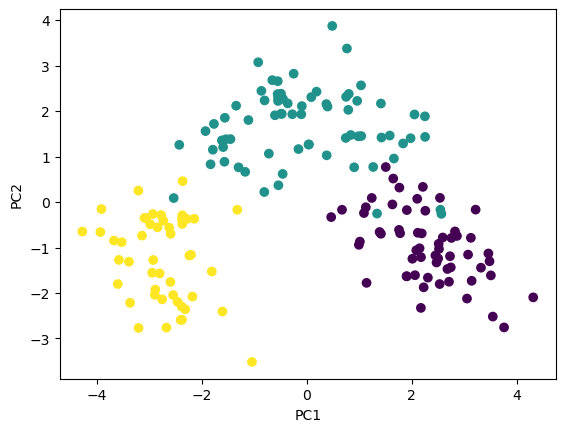

In [13]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [15]:
# Perform K-Means clustering on the PCA-transformed data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Print the cluster labels
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


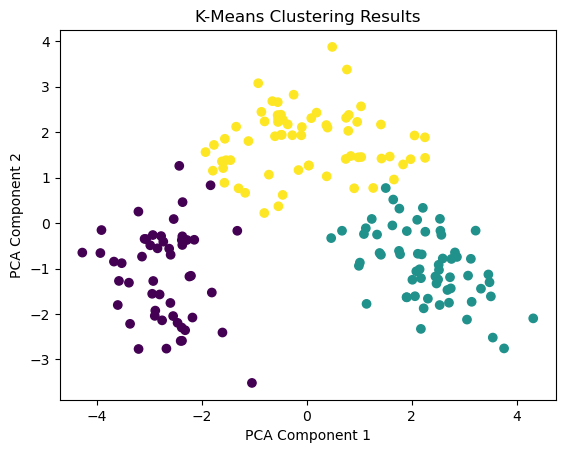

In [16]:
import matplotlib.pyplot as plt

# Visualize the K-Means clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### Interpret the results of PCA and clustering analysis.

In [ ]:
The PCA analysis showed that the first two principal components explain a significant amount of the variance in the data. 
In fact, the first principal component explains about 36% of the total variance in the data, while the second principal component explains about 20% of the variance. 
This suggests that a significant amount of the variability in the Wine dataset can be captured using just two principal components.

The scatter plot of the first two principal components also revealed some interesting patterns in the data.
We can see that there is some degree of separation between the three classes (denoted by different colors) in the reduced-dimensional space. 
This suggests that the PCA-transformed data can be useful for visualizing the structure of the Wine dataset and potentially for identifying patterns or relationships between the different features.

The K-Means clustering analysis grouped the data into three clusters, which corresponds to the number of classes in the original dataset. 
The cluster labels assigned by the algorithm generally agree with the true class labels, although there may be some misclassifications. 
This suggests that K-Means clustering can be a useful technique for grouping similar data points together and potentially for identifying subgroups or patterns within the Wine dataset.

Overall, the results of PCA and clustering analysis suggest that the Wine dataset contains some structure and patterns that can be visualized and potentially analyzed using lower-dimensional representations of the data. 
These techniques can help us gain insights into the relationships between different features and potentially identify subgroups or patterns within the data.